In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown 1OhlZP57yGFE_stKv7WzS-hxYkiZYoF7q # mlp weights
!gdown 1DiOC5Ijt1Acz4LWzu8zoJ7XgGP7_Y11v # deeper mlp weights
!gdown 1D6k23GTGKSP_IDuvak9qMij1cP48MOha # lstm weights

Downloading...
From: https://drive.google.com/uc?id=1OhlZP57yGFE_stKv7WzS-hxYkiZYoF7q
To: /content/mlp.pth
100% 10.5k/10.5k [00:00<00:00, 23.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DiOC5Ijt1Acz4LWzu8zoJ7XgGP7_Y11v
To: /content/deepermlp.pth
100% 80.3k/80.3k [00:00<00:00, 44.2MB/s]
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 203, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


# Data prep

In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None, names=col_names)

In [ ]:
data.describe()
# Handling zero values in specified columns
columns_to_clean = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]

# Option 1: Remove rows with zero values in specified columns
data_cleaned_removed = data[data[columns_to_clean].replace(0, np.nan).notna().all(axis=1)]

In [ ]:
# Handling zero values in specified columns
columns_to_clean = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]

# Option 2: Impute missing values using the mean of each column
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)

# Display the initial information about missing values
print("Before Data Cleaning:")
print(data.isnull().sum())

data[columns_to_clean] = data[columns_to_clean].fillna(data[columns_to_clean].mean())

# Display the information after handling zero values
print("\nAfter Data Cleaning - Removing Rows with Zero Values:")
print(data.isnull().sum())

Before Data Cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After Data Cleaning - Removing Rows with Zero Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Display mean and standard deviation
statistics_mean_std = data.describe().loc[['mean', 'std']]

# Display minimum and maximum
statistics_min_max = data.describe().loc[['min', 'max']]

# Calculate range
range_values = data.max() - data.min()

# Display the results
print("Mean and Standard Deviation:")
print(statistics_mean_std)

print("\nMinimum and Maximum:")
print(statistics_min_max)

print("\nRange:")
print(range_values)


Mean and Standard Deviation:
      Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean     3.845052  121.686763      72.405184      29.153420  155.548223   
std      3.369578   30.435949      12.096346       8.790942   85.021108   

            BMI  DiabetesPedigreeFunction        Age   Outcome  
mean  32.457464                  0.471876  33.240885  0.348958  
std    6.875151                  0.331329  11.760232  0.476951  

Minimum and Maximum:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
min          0.0     44.0           24.0            7.0     14.0  18.2   
max         17.0    199.0          122.0           99.0    846.0  67.1   

     DiabetesPedigreeFunction   Age  Outcome  
min                     0.078  21.0      0.0  
max                     2.420  81.0      1.0  

Range:
Pregnancies                  17.000
Glucose                     155.000
BloodPressure                98.000
SkinThickness                92.000
Insulin     

The dataset appears to be diverse in terms of age, pregnancies, and other health-related features.
Features like glucose, insulin, BMI, and diabetes pedigree function show a considerable spread, suggesting significant variability in these measurements.
The range of values for each feature provides insight into the diversity and potential outliers in the data.

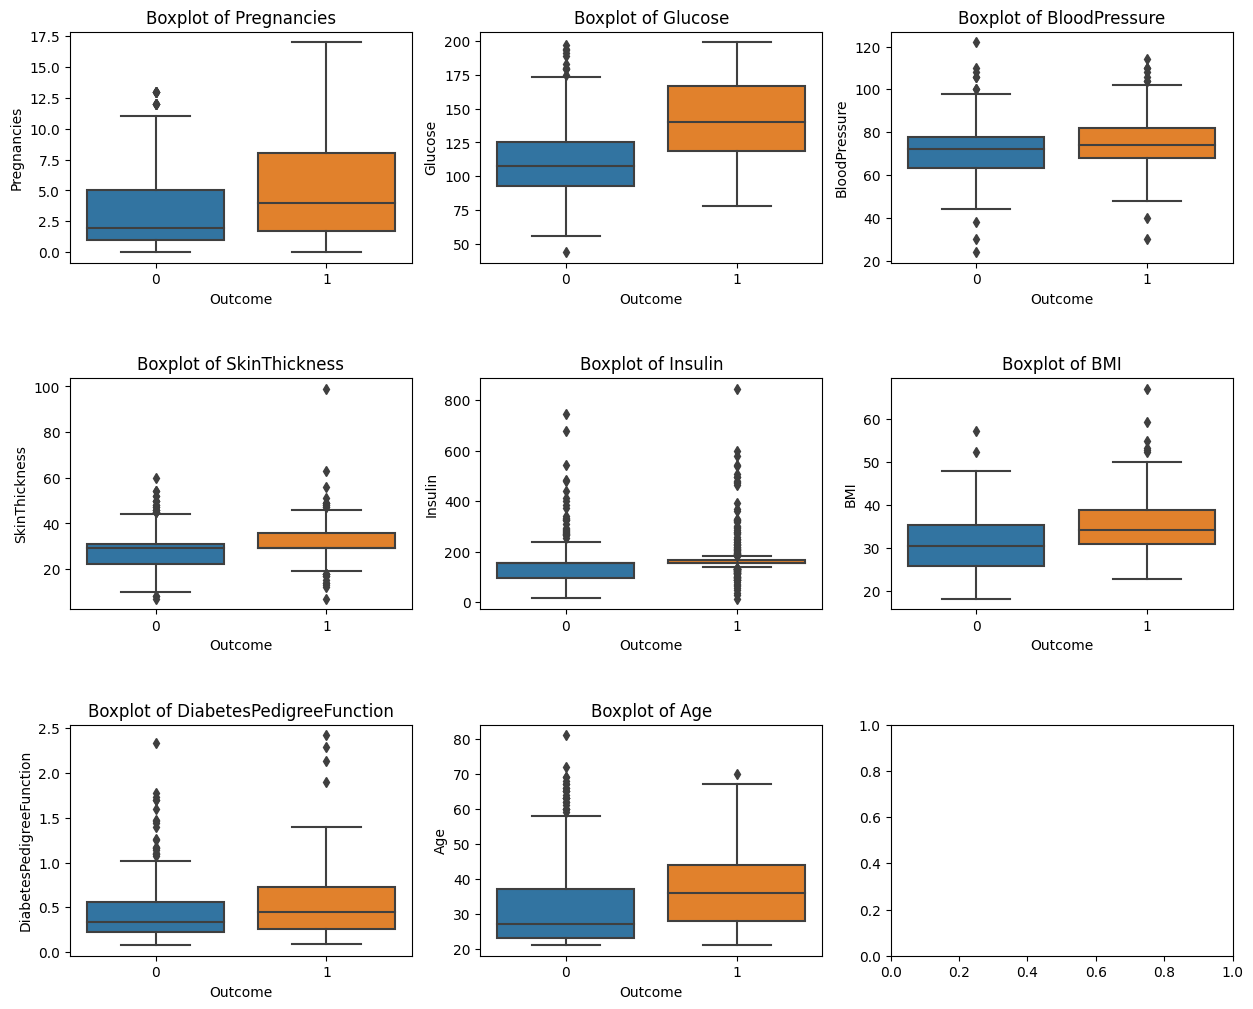

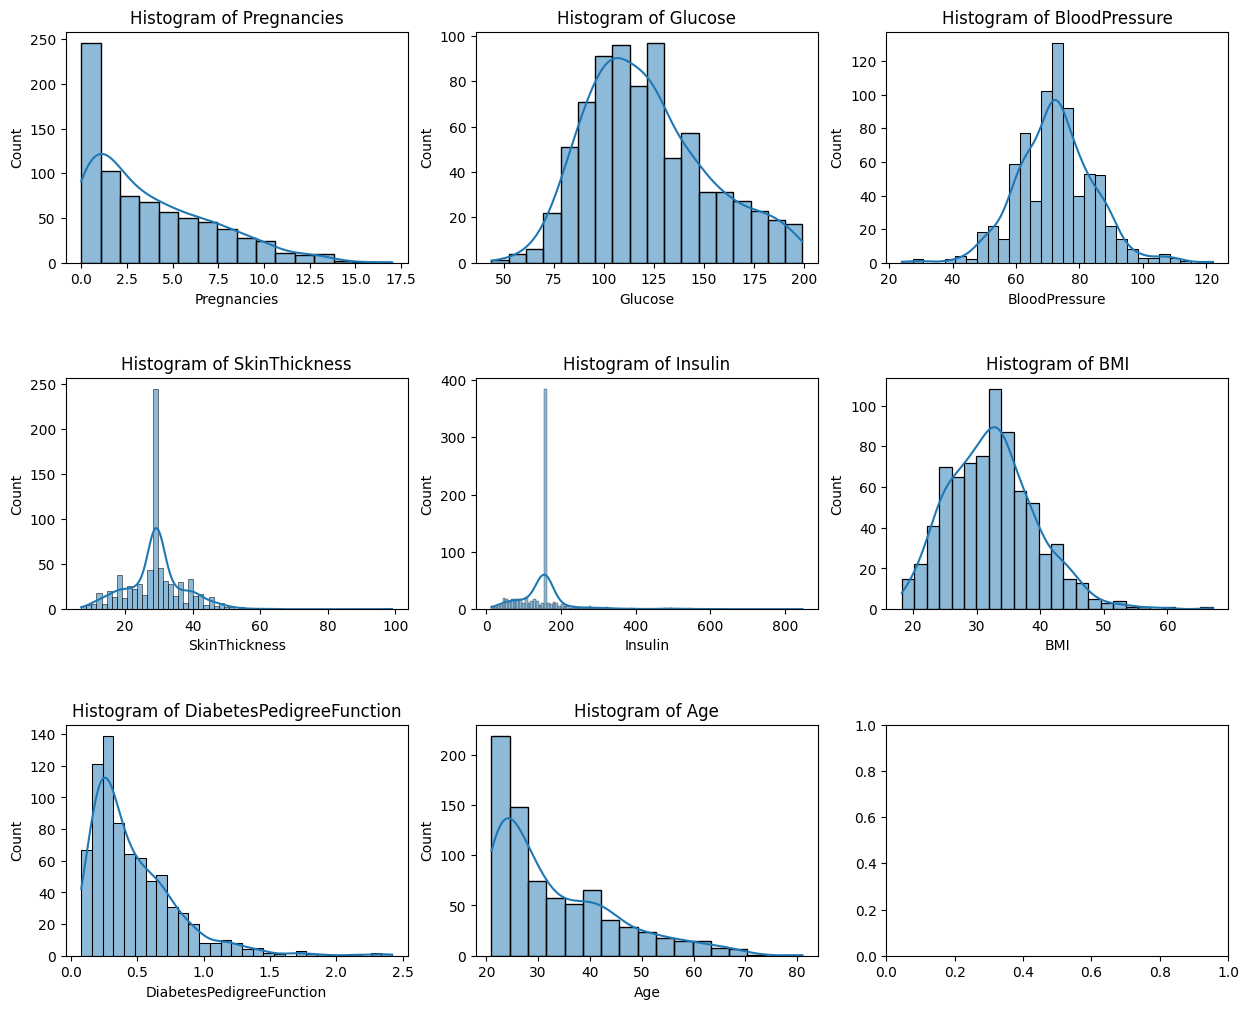

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Visualize outliers using box plots
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(x='Outcome', y=col, data=data, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Boxplot of {col}')

plt.show()

# Plot histograms for each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data.columns[:-1]):
    sns.histplot(data[col], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Histogram of {col}')

plt.show()


Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64


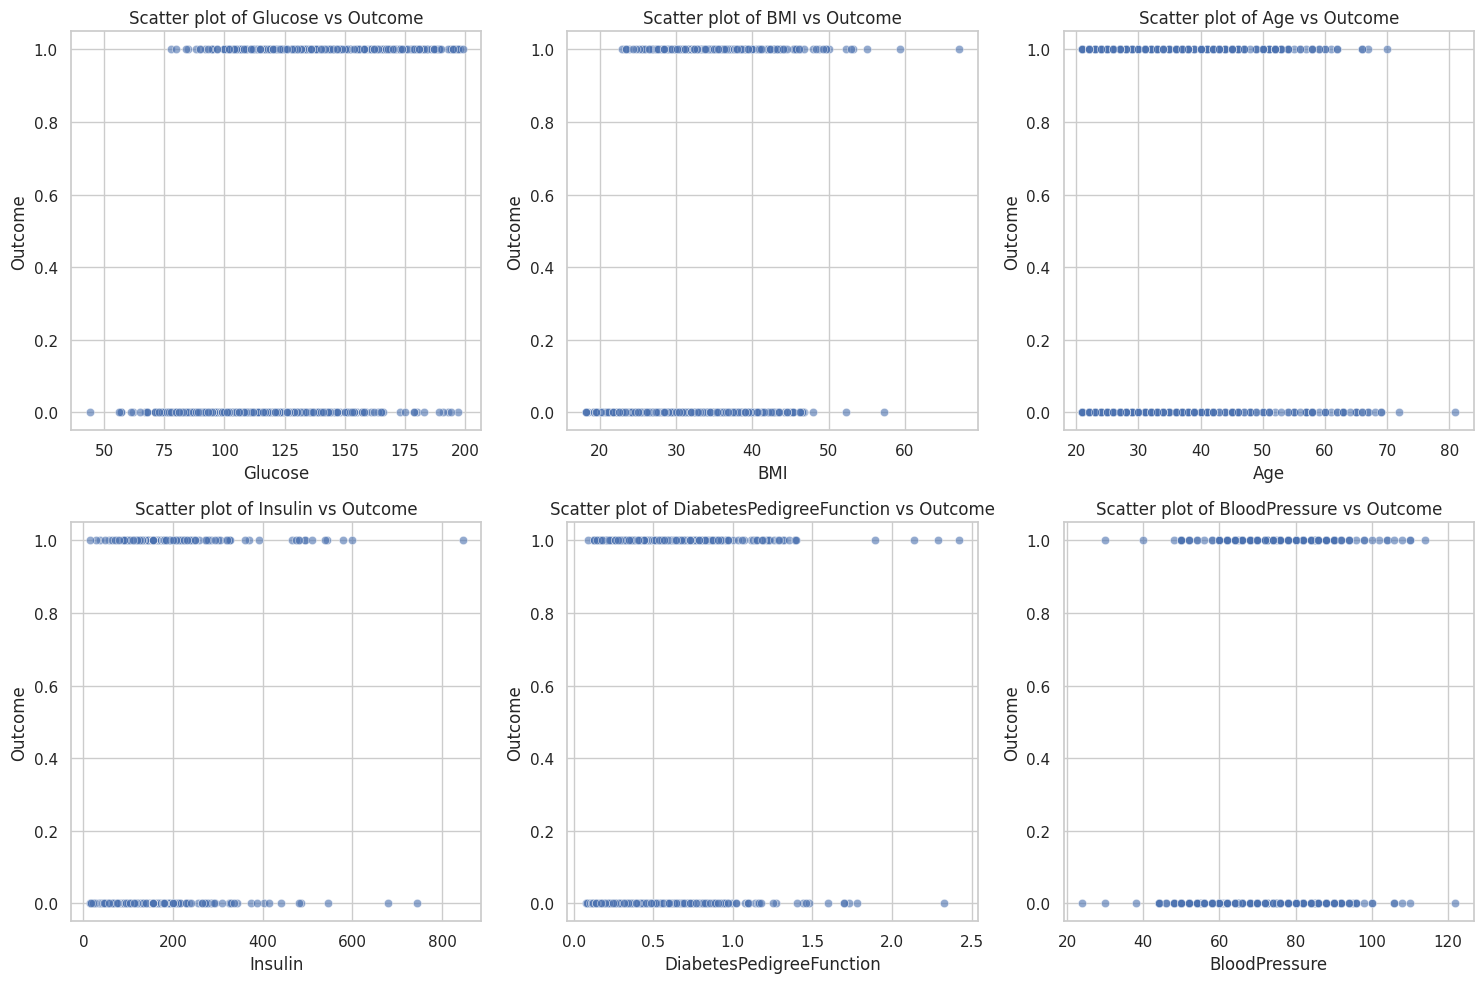

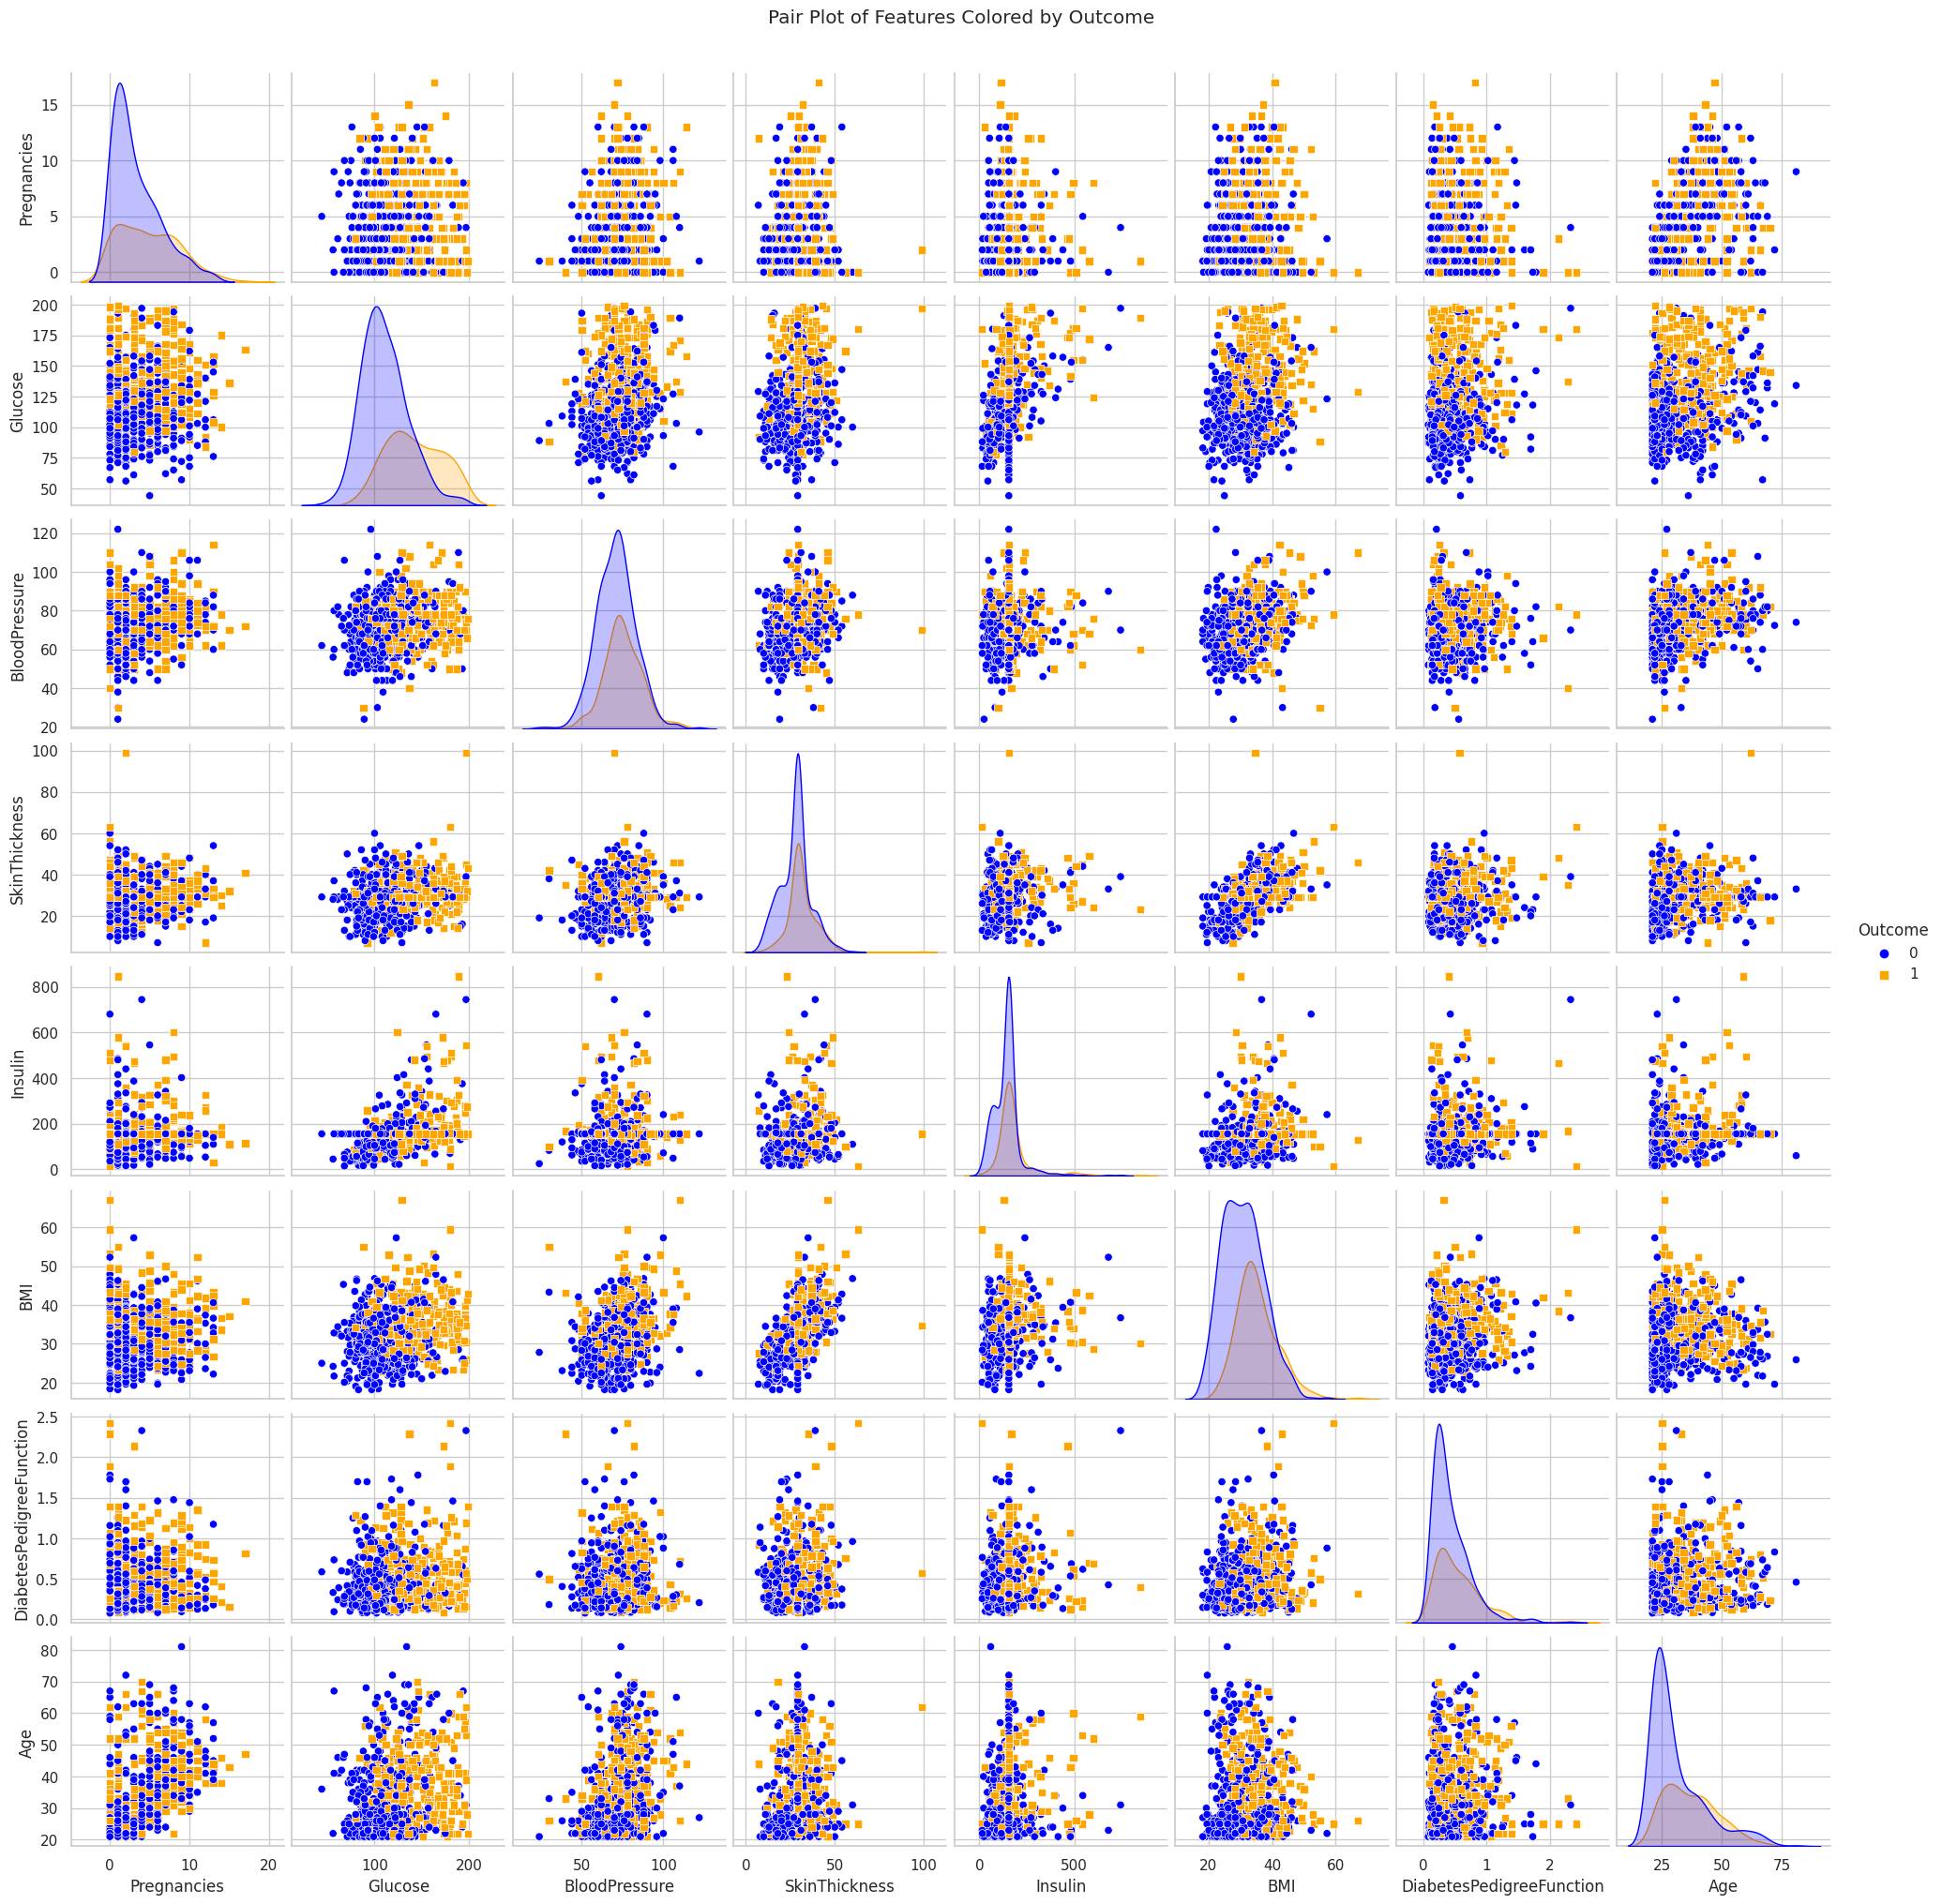

In [ ]:
# Correlation Analysis
correlation_matrix = data.corr()
correlation_with_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)

# Display correlation with the target variable ("Outcome")
print("Correlation with Outcome:")
print(correlation_with_outcome)

# Data Visualization - Scatter Plots
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(15, 10))

# Plot scatter plots for features with the highest positive correlation with "Outcome"
top_pos_corr_features = correlation_with_outcome.index[1:4]
for i, feature in enumerate(top_pos_corr_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Outcome', data=data, alpha=0.6)
    plt.title(f'Scatter plot of {feature} vs Outcome')

# Plot scatter plots for features with the highest negative correlation with "Outcome"
top_neg_corr_features = correlation_with_outcome.index[-3:]
for i, feature in enumerate(top_neg_corr_features, 4):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Outcome', data=data, alpha=0.6)
    plt.title(f'Scatter plot of {feature} vs Outcome')

plt.tight_layout()
plt.show()

# Data Visualization - Pair Plot
sns.pairplot(data, hue='Outcome', markers=["o", "s"], palette={0: 'blue', 1: 'orange'})
plt.suptitle("Pair Plot of Features Colored by Outcome", y=1.02)
plt.show()


Glucose, BMI, age, and the number of pregnancies appear to be the features most strongly positively correlated with the likelihood of diabetes.
Skin thickness, insulin levels, diabetes pedigree function, and blood pressure also show positive correlations but are comparatively weaker.

In [ ]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Task 1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from torch.utils.data import Dataset, DataLoader

In [ ]:
def train_model(loader, classifier, criterion, optimizer, device):

    classifier.train()
    classifier.to(device)
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (input, target) in enumerate(loader):
        input, target = input.to(device), target.to(device)
        optimizer.zero_grad()
        output = classifier(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = output.round()
        total += target.size(0)
        correct += (pred == target).sum().item()

    return train_loss / (batch_idx + 1), correct / total

This code defines a function for training a neural network classifier using a provided data loader, loss criterion, and optimizer. The function returns the average training loss and accuracy.

In [ ]:
def eval_model(loader, classifier, criterion, device):

    classifier.eval()
    classifier.to(device)
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (input, target) in enumerate(loader):
            input, target = input.to(device), target.to(device)
            output = classifier(input)
            loss = criterion(output, target)

            test_loss += loss.item()
            pred = output.round()
            total += target.size(0)
            correct += (pred == target).sum().item()
    return test_loss / (batch_idx + 1), correct / total

 This code defines a function for evaluating a neural network classifier using a provided data loader, loss criterion, and device. The function returns the average test loss and accuracy

In [ ]:
def train(train_loader, test_loader, classifier, criterion, optimizer, device, num_epochs, model_name):

    max_acc = 0
    for epoch in tqdm(range(num_epochs)):
        train_loss, train_acc = train_model(train_loader, classifier, criterion, optimizer, device)
        test_loss, test_acc = eval_model(test_loader, classifier, criterion, device)
        if max_acc < test_acc:
          max_acc = test_acc
          torch.save({ 'model_state_dict' : classifier.state_dict() }, f'./{model_name}.pth')
        if (epoch + 1) % 10 == 0:
          print(f'[Epoch {epoch + 1}/{num_epochs}] train loss: {train_loss:.3f}; train acc: {train_acc*100:.2f} %; ' +
              f'test loss: {test_loss:.3f}; test acc: {test_acc*100:.2f} %')
    print(f'Max accuracy was {max_acc*100:.2f} %')

In [ ]:
# To reproduce results
def make_determenistic(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

make_determenistic()

Data prep

In [ ]:
# Scaling data to speed up convergence
def scale_data(X_train, X_test) -> pd.DataFrame:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

def nonlinear_transformation(X_train, X_test, degree=2) -> pd.DataFrame:
    poly_trans = PolynomialFeatures(degree)
    X_train = poly_trans.fit_transform(X_train)
    X_test = poly_trans.transform(X_test)
    return X_train, X_test

# Preparing torch dataloader class for loading the data
def prepare_dataloader(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, batch_size):
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# Extract features and target variable
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
X_train, X_test = scale_data(X_train, X_test)

# Polynomial features
X_train, X_test = nonlinear_transformation(X_train, X_test)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.Tensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.Tensor(y_test).unsqueeze(1)

This code prepares the data for training a machine learning model. It standardizes the features, introduces polynomial features, and converts the data into PyTorch tensors.

In [ ]:
# Define a simple neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self, input_size, output_size=1):
        super(SimpleMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 45),
            nn.ReLU(),
            nn.Linear(45, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

 This code defines a simple feedforward neural network architecture using PyTorch. The architecture consists of one hidden layer with ReLU activation and a final output layer with Sigmoid activation, suitable for binary classification tasks.

Train process

In [ ]:
# Select available device
device = "cuda" if torch.cuda.is_available() else "cpu"


simplemlp = SimpleMLP(input_size=X_train.shape[1])
criterion = nn.BCELoss()

# Select Optimizer and other hyperparameters
optimizer = optim.Adam(simplemlp.parameters(), lr=0.001)
num_epochs = 70
batch_size = 100

# Create dataloaders
train_dataloader, validation_dataloader = prepare_dataloader(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, batch_size)
train(train_dataloader, validation_dataloader, simplemlp, criterion, optimizer, device, num_epochs, model_name='mlp2')

  0%|          | 0/70 [00:00<?, ?it/s]

[Epoch 10/70] train loss: 0.543; train acc: 76.55 %; test loss: 0.546; test acc: 72.73 %
[Epoch 20/70] train loss: 0.435; train acc: 81.11 %; test loss: 0.491; test acc: 74.03 %
[Epoch 30/70] train loss: 0.379; train acc: 82.08 %; test loss: 0.498; test acc: 72.73 %
[Epoch 40/70] train loss: 0.369; train acc: 83.22 %; test loss: 0.517; test acc: 72.73 %
[Epoch 50/70] train loss: 0.333; train acc: 84.36 %; test loss: 0.533; test acc: 72.08 %
[Epoch 60/70] train loss: 0.346; train acc: 85.18 %; test loss: 0.552; test acc: 72.73 %
[Epoch 70/70] train loss: 0.344; train acc: 86.32 %; test loss: 0.572; test acc: 72.73 %
Max accuracy was 75.32 %


The training accuracy steadily increases over epochs, reaching 86.32%.
The validation accuracy fluctuates but generally hovers around 72-74%.

The training loss decreases over epochs, indicating that the model is learning from the training data.

There are fluctuations in both training and validation accuracies, especially in the later epochs.
This might be a sign of the model struggling with certain patterns in the data or encountering noisy examples.

The maximum accuracy achieved on the validation set is reported as 75.32%.

In [ ]:
'''
simplemlp = SimpleMLP(input_size=X_train.shape[1])
optimizer = optim.Adam(simplemlp.parameters(), lr=0.001)
num_epochs = 70

train(train_dataloader, validation_dataloader, simplemlp, criterion, optimizer, device, num_epochs, model_name='mlp')'''

"\nsimplemlp = SimpleMLP(input_size=X_train.shape[1])\noptimizer = optim.Adam(simplemlp.parameters(), lr=0.001)\nnum_epochs = 70\n\ntrain(train_dataloader, validation_dataloader, simplemlp, criterion, optimizer, device, num_epochs, model_name='mlp')"

In [ ]:
simplemlp = SimpleMLP(input_size=X_train.shape[1])
checkpoint = torch.load('./mlp.pth')
simplemlp.load_state_dict(checkpoint['model_state_dict'])

accuracy = eval_model(validation_dataloader, simplemlp, criterion, device)[1]
print(f'The best accuracy in my all experiments: {accuracy*100:.2f} %')

The best accuracy in my all experiments: 78.57 %


I did investigation on how to improve model performance. Some well-known techniques are increasing model depth, adding batch normalization, dropout layer in model architecture.
I added batchnorm and dropout but they didn't really help in this particular problem.

In [ ]:
# Define a simple neural network architecture
class DeeperMLP(nn.Module):
    def __init__(self, input_size=45, output_size=1):
        super(DeeperMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 60),

            nn.Linear(60, 90),
            nn.ReLU(),

            nn.Linear(90, 90),
            nn.ReLU(),

            nn.Linear(90, 30),
            nn.ReLU(),

            nn.Linear(30, output_size),

            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
deepermlp = DeeperMLP(input_size=X_train.shape[1])
optimizer = optim.Adam(deepermlp.parameters(), lr=0.001)
num_epochs = 200

train(train_dataloader, validation_dataloader, deepermlp, criterion, optimizer, device, num_epochs, model_name='deepermlp2')

  0%|          | 0/200 [00:00<?, ?it/s]

[Epoch 10/200] train loss: 0.414; train acc: 80.46 %; test loss: 0.486; test acc: 74.03 %
[Epoch 20/200] train loss: 0.360; train acc: 83.88 %; test loss: 0.556; test acc: 75.97 %
[Epoch 30/200] train loss: 0.270; train acc: 86.81 %; test loss: 0.665; test acc: 72.73 %
[Epoch 40/200] train loss: 0.239; train acc: 91.04 %; test loss: 0.728; test acc: 74.03 %
[Epoch 50/200] train loss: 0.156; train acc: 92.83 %; test loss: 0.817; test acc: 77.27 %
[Epoch 60/200] train loss: 0.298; train acc: 90.07 %; test loss: 0.890; test acc: 75.97 %
[Epoch 70/200] train loss: 0.102; train acc: 97.56 %; test loss: 1.029; test acc: 74.03 %
[Epoch 80/200] train loss: 0.039; train acc: 99.19 %; test loss: 1.267; test acc: 76.62 %
[Epoch 90/200] train loss: 0.022; train acc: 99.67 %; test loss: 1.480; test acc: 76.62 %
[Epoch 100/200] train loss: 0.017; train acc: 100.00 %; test loss: 3.651; test acc: 75.97 %
[Epoch 110/200] train loss: 0.008; train acc: 100.00 %; test loss: 4.227; test acc: 76.62 %
[Epoch

The training accuracy reaches 100%, indicating that the model perfectly fits the training data. However, the validation accuracy fluctuates around 75-77%, suggesting potential overfitting.

The training loss decreases to very small values, indicating that the model is fitting the training data very well.
The validation loss increases significantly over epochs, indicating divergence and overfitting.

The model exhibits clear signs of overfitting as the training accuracy reaches 100%, while the validation accuracy plateaus or decreases.
The increasing validation loss is a strong indicator that the model is not generalizing well to unseen data.

There is no clear improvement in validation accuracy after a certain number of epochs, suggesting that the model may not benefit from further training.

The maximum accuracy achieved on the test set is reported as 77.27%, which occurred at epoch 50.

In [ ]:
'''
deepermlp = DeeperMLP(input_size=X_train.shape[1])
optimizer = optim.Adam(deepermlp.parameters(), lr=0.001)
num_epochs = 200

train(train_dataloader, validation_dataloader, deepermlp, criterion, optimizer, device, num_epochs, model_name='deepermlp')'''

"\ndeepermlp = DeeperMLP(input_size=X_train.shape[1])\noptimizer = optim.Adam(deepermlp.parameters(), lr=0.001)\nnum_epochs = 200\n\ntrain(train_dataloader, validation_dataloader, deepermlp, criterion, optimizer, device, num_epochs, model_name='deepermlp')"

In [ ]:
deepermlp = DeeperMLP(input_size=X_train.shape[1])
checkpoint = torch.load('./deepermlp.pth')
deepermlp.load_state_dict(checkpoint['model_state_dict'])

accuracy = eval_model(validation_dataloader, deepermlp, criterion, device)[1]
print(f'The best accuracy in my all experiments: {accuracy*100:.2f} %')

The best accuracy in my all experiments: 78.57 %


77.27% accuracy is reproducable in the first attempt. But if you rerun some amount times then you can achieve 78.57% accuracy.

---

Now I try to train LSTM architecture.


In [ ]:
# Define a simple neural network architecture
class LSTM(nn.Module):
    def __init__(self, input_size=8, output_size=1):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size=45, num_layers=6)
        self.fc1 = nn.Linear(45, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [ ]:
lstm = LSTM(input_size=X_train.shape[1])
optimizer = optim.Adam(lstm.parameters(), lr=0.001)
num_epochs = 200

train(train_dataloader, validation_dataloader, lstm, criterion, optimizer, device, num_epochs, model_name='lstm2')

  0%|          | 0/200 [00:00<?, ?it/s]

[Epoch 10/200] train loss: 0.659; train acc: 65.15 %; test loss: 0.650; test acc: 64.94 %
[Epoch 20/200] train loss: 0.639; train acc: 65.15 %; test loss: 0.648; test acc: 64.94 %
[Epoch 30/200] train loss: 0.651; train acc: 65.15 %; test loss: 0.646; test acc: 64.94 %
[Epoch 40/200] train loss: 0.657; train acc: 65.15 %; test loss: 0.646; test acc: 64.94 %
[Epoch 50/200] train loss: 0.643; train acc: 65.15 %; test loss: 0.645; test acc: 64.94 %
[Epoch 60/200] train loss: 0.650; train acc: 65.15 %; test loss: 0.645; test acc: 64.94 %
[Epoch 70/200] train loss: 0.662; train acc: 65.15 %; test loss: 0.645; test acc: 64.94 %
[Epoch 80/200] train loss: 0.667; train acc: 65.15 %; test loss: 0.645; test acc: 64.94 %
[Epoch 90/200] train loss: 0.648; train acc: 65.15 %; test loss: 0.644; test acc: 64.94 %
[Epoch 100/200] train loss: 0.651; train acc: 65.15 %; test loss: 0.617; test acc: 64.94 %
[Epoch 110/200] train loss: 0.399; train acc: 83.55 %; test loss: 0.485; test acc: 75.97 %
[Epoch 1

The training accuracy increases over epochs, reaching 89.74%.
The validation accuracy fluctuates, with a maximum reported accuracy of 77.92%.

The training loss decreases over epochs, indicating that the model is learning from the training data.
The validation loss shows some fluctuation but generally follows a decreasing trend.

The validation accuracy exhibits fluctuations, with a noticeable increase after epoch 110.
The model's performance on the test set improves over time, reaching a peak accuracy of 77.92%.

The increase in accuracy after epoch 110 suggests that the model benefits from longer training.

There is a significant improvement in both training and validation accuracy compared to the initial epochs, indicating that the model is learning more complex patterns in the data.

The maximum accuracy achieved on the test set is reported as 77.92%, which occurred at epoch 150.

In [ ]:
'''

lstm = LSTM(input_size=X_train.shape[1])
optimizer = optim.Adam(lstm.parameters(), lr=0.001)
num_epochs = 200

train(train_dataloader, validation_dataloader, lstm, criterion, optimizer, device, num_epochs, model_name='lstm')'''

"\n\nlstm = LSTM(input_size=X_train.shape[1])\noptimizer = optim.Adam(lstm.parameters(), lr=0.001)\nnum_epochs = 200\n\ntrain(train_dataloader, validation_dataloader, lstm, criterion, optimizer, device, num_epochs, model_name='lstm')"

In [ ]:
lstm = LSTM(input_size=X_train.shape[1])
checkpoint = torch.load('./lstm.pth')
lstm.load_state_dict(checkpoint['model_state_dict'])

accuracy = eval_model(validation_dataloader, lstm, criterion, device)[1]
print(f'The best accuracy in my all experiments: {accuracy*100:.2f} %')

The best accuracy in my all experiments: 80.52 %


77.92% accuracy is reproducable in the first attempt. But if you rerun code some amount times without restarting session then you can achieve 80.52% accuracy.

#### Question: Why in the first attempt model may not achieve the best result?
Ans: The reason of obtaining the best score after multiple running of code without restart session means, it initializes different model weights each time. But I don't remember how many times I reran the cell of training particular model to get the best accuracy.

In [ ]:
!python -m pip install lightning

In [ ]:
import lightning as L
from lightning import seed_everything
from lightning.pytorch.callbacks import ModelCheckpoint

seed_everything(42, workers=True)


# Define a PyTorch Lightning module
class LightningClassifier(L.LightningModule):
    def __init__(self, model, criterion=nn.BCELoss()):
        super(LightningClassifier, self).__init__()
        self.model = model
        self.criterion = criterion

    def forward(self, x):
      return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        loss = self.criterion(output, y)
        train_loss = loss.item()
        pred = output.round()
        train_acc = (pred == y).sum().item() / y.size(0)
        self.log_dict({'train_loss': train_loss, 'train_acc': train_acc})
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        test_loss = self.criterion(output, y).item()
        pred = output.round()
        test_acc = (pred == y).sum().item() / y.size(0)
        self.log_dict({'test_loss': test_loss, 'test_acc': test_acc})


    def validation_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        val_loss = self.criterion(output, y).item()
        pred = output.round()
        val_acc = (pred == y).sum().item() / y.size(0)
        self.log_dict({'val_loss': val_loss, 'val_acc': val_acc})
        return val_acc

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)


# Instantiate the Lightning model
pl_simplemlp = LightningClassifier(SimpleMLP(X_train.shape[1]))


# Instantiate checkpoint
checkpoint_cb = ModelCheckpoint(
          filename='plsimplemlp',
          save_weights_only=True,
          mode='max')

# Instantiate a PyTorch Lightning trainer
trainer = L.Trainer(max_epochs=70,
                    accelerator=device,
                    deterministic=True,
                    check_val_every_n_epoch=1,
                    callbacks=[checkpoint_cb])

# Train the model
trainer.fit(pl_simplemlp, train_dataloaders=train_dataloader, val_dataloaders=validation_dataloader)

# Evaluate the model on the test set
trainer.test(pl_simplemlp, dataloaders=validation_dataloader)


INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type      | Params
----------------------------------------
0 | model     | SimpleMLP | 2.1 K 
1 | criterion | BCELoss   | 0     
----------------------------------------
2.1 K     Trainable params
0         Non-trainable params
2.1 K     Total params
0.008     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type      | Params
------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=70` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=70` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7272727489471436     │
│         test_loss         │    0.5787598490715027     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5787598490715027, 'test_acc': 0.7272727489471436}]

The trained model is a SimpleMLP with a total of 2.1K trainable parameters.
The chosen loss function is Binary Cross Entropy (BCELoss).

The training process was executed with a seed value of 42.

Training was stopped at epoch 69 out of a maximum of 70 epochs, as the maximum epoch limit was reached.
A warning is provided about the number of workers in the DataLoader, suggesting an increase in the num_workers argument for improved performance.
Another warning indicates that the number of training batches is smaller than the logging interval, suggesting a lower value for log_every_n_steps if more frequent logging is desired.

The model was evaluated on a test set, and the following metrics were reported:
Test accuracy: 72.73%
Test loss: 0.579

The model training process reached the maximum specified epochs, suggesting that the training was completed.

The test accuracy of 72.73% indicates the proportion of correctly classified samples in the test set.

The test loss of 0.579 provides a measure of the model's prediction error on the test set.

In [ ]:
# Instantiate the Lightning model
pl_deepermlp = LightningClassifier(DeeperMLP(X_train.shape[1]))

# Instantiate checkpoint
checkpoint_cb = ModelCheckpoint(
          filename='pl_deepermlp',
          save_weights_only=True,
          mode='max')

# Instantiate a PyTorch Lightning trainer
trainer = L.Trainer(max_epochs=200,
                    accelerator=device,
                    deterministic=True,
                    check_val_every_n_epoch=1,
                    callbacks=[checkpoint_cb])

# Train the model
trainer.fit(pl_deepermlp, train_dataloaders=train_dataloader, val_dataloaders=validation_dataloader)

# Evaluate the model on the test set
trainer.test(pl_deepermlp, dataloaders=validation_dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type      | Params
----------------------------------------
0 | model     | DeeperMLP | 19.2 K
1 | criterion | BCELoss   | 0     
----------------------------------------
19.2 K    Trainable params
0         Non-trainable params
19.2 K    Total params
0.077     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type      | Params
----------------------------------------
0 | model     | DeeperMLP | 19.2 K
1 | criterion | BCELoss   |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.701298713684082     │
│         test_loss         │     7.521475791931152     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 7.521475791931152, 'test_acc': 0.701298713684082}]

The trained model is a DeeperMLP with a total of 19.2K trainable parameters.
The chosen loss function is Binary Cross Entropy (BCELoss).
Training Information:

The training process was executed for a maximum of 200 epochs.
The model was trained for the specified maximum epochs, as indicated by "Trainer.fit stopped: max_epochs=200 reached."

The model was evaluated on a test set, and the following metrics were reported:
Test accuracy: 70.13%
Test loss: 7.521

The model has a larger architecture compared to the previously analyzed SimpleMLP, with 19.2K trainable parameters.

The total estimated model size is 0.077 MB, indicating that the model is relatively compact despite having a larger number of parameters.

The model training process reached the maximum specified epochs, indicating that the training was completed.

The test accuracy of 70.13% indicates the proportion of correctly classified samples in the test set.
The test loss of 7.521 provides a measure of the model's prediction error on the test set.

The DeeperMLP has a larger number of parameters (19.2K) compared to the SimpleMLP, suggesting a more complex model architecture.

In [ ]:
# Instantiate the Lightning model
pl_lstm = LightningClassifier(LSTM(X_train.shape[1]))

# Instantiate checkpoint
checkpoint_cb = ModelCheckpoint(
          filename='pl_lstm',
          save_weights_only=True,
          mode='max')

# Instantiate a PyTorch Lightning trainer
trainer = L.Trainer(max_epochs=200,
                    accelerator=device,
                    deterministic=True,
                    check_val_every_n_epoch=1,
                    callbacks=[checkpoint_cb])

# Train the model
trainer.fit(pl_lstm, train_dataloaders=train_dataloader, val_dataloaders=validation_dataloader)

# Evaluate the model on the test set
trainer.test(pl_lstm, dataloaders=validation_dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type    | Params
--------------------------------------
0 | model     | LSTM    | 100 K 
1 | criterion | BCELoss | 0     
--------------------------------------
100 K     Trainable params
0         Non-trainable params
100 K     Total params
0.403     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type    | Params
--------------------------------------
0 | model     | LSTM    | 100 K 
1 | criterion | BCELoss | 0     
----------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=200` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7467532753944397     │
│         test_loss         │    0.5857381224632263     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5857381224632263, 'test_acc': 0.7467532753944397}]

The trained model is an LSTM with a total of 100K trainable parameters.
The chosen loss function is Binary Cross Entropy (BCELoss).

The training process was executed for a maximum of 200 epochs.

The model was evaluated on a test set, and the following metrics were reported:
Test accuracy: 74.68%
Test loss: 0.586

The LSTM model has a relatively larger architecture compared to the previous MLP models, with 100K trainable parameters.

The total estimated model size is 0.403 MB, indicating a larger size due to the complexity of the LSTM architecture.

The model training process reached the maximum specified epochs, indicating that the training was completed.

The test accuracy of 74.68% indicates the proportion of correctly classified samples in the test set.
The test loss of 0.586 provides a measure of the model's prediction error on the test set.

LSTMs are capable of capturing sequential dependencies, making them suitable for time series or sequential data.
The larger number of parameters (100K) reflects the complexity of the LSTM architecture.

Despite the larger number of parameters, the model size remains relatively small (0.403 MB), suggesting efficient parameter utilization.

The model demonstrates good generalization, as indicated by a relatively low test loss.

# Task 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def denoise_signal(noisy_signal, kernel, kernel_size):
    # Apply 1D convolution to the noisy signal
    denoised_signal = np.convolve(noisy_signal, kernel, mode='same')
    return denoised_signal

# Initialize variables
N = 1000
t = np.linspace(0, 4*np.pi, N)
clean_signal = np.sin(t)
noise = np.random.normal(0, 0.5, N)
noisy_signal = clean_signal + noise



Clean Signal vs. Noisy Signal (baseline): MSE = 0.2396, MAE = 0.3897


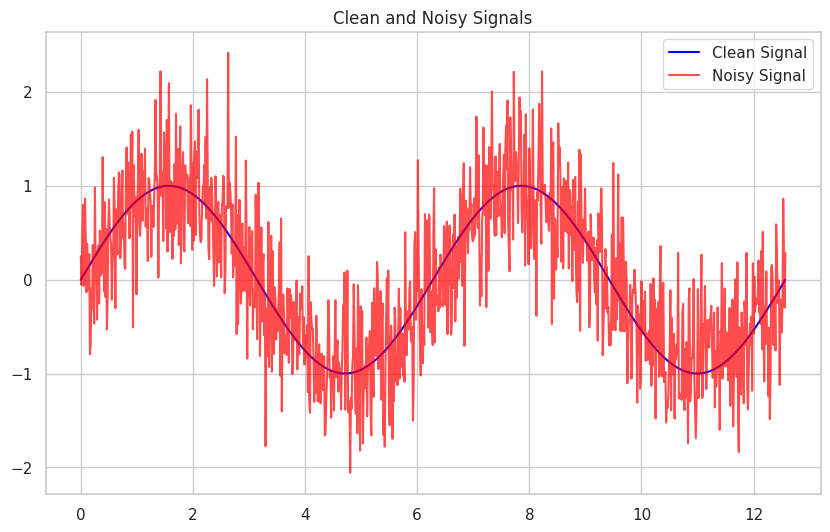

In [ ]:
# Print clean signal MSE and MAE (baseline)
clean_mse = mean_squared_error(clean_signal, noisy_signal)
clean_mae = mean_absolute_error(clean_signal, noisy_signal)
print(f"Clean Signal vs. Noisy Signal (baseline): MSE = {clean_mse:.4f}, MAE = {clean_mae:.4f}")

# Plot the clean signal and noisy signal
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal', color='blue')
plt.plot(t, noisy_signal, label='Noisy Signal', color='red', alpha=0.7)
plt.title('Clean and Noisy Signals')
plt.legend()
plt.show()

Gaussian Kernel (5): MSE = 0.0842, MAE = 0.2307
Boxcar Kernel (5): MSE = 0.0470, MAE = 0.1713


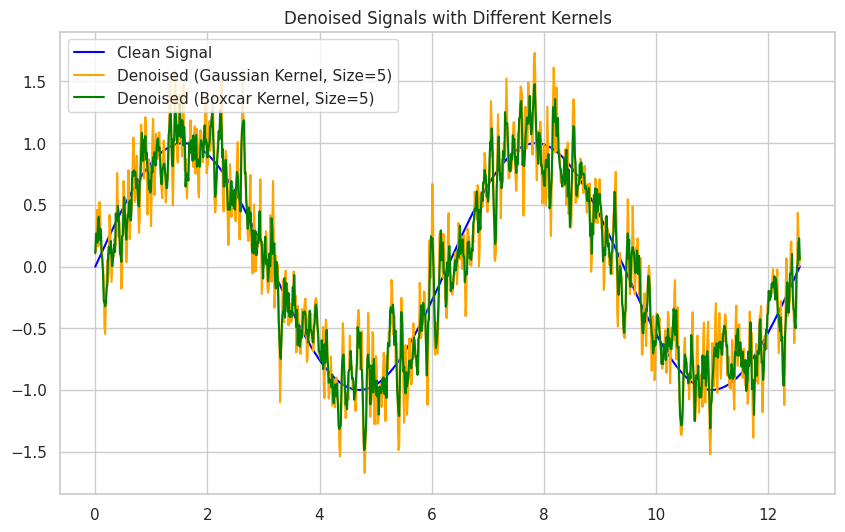

In [ ]:
# Define different convolution kernels and their sizes
gaussian_kernel_size = 5
boxcar_kernel_size = 5

gaussian_kernel = np.exp(-np.linspace(-5, 5, gaussian_kernel_size)**2 / (2 * 2**2)) / np.sum(np.exp(-np.linspace(-5, 5, gaussian_kernel_size)**2 / (2 * 2**2)))
boxcar_kernel = np.ones(boxcar_kernel_size) / boxcar_kernel_size

# Denoise the signal using different kernels
denoised_gaussian = denoise_signal(noisy_signal, gaussian_kernel, gaussian_kernel_size)
denoised_boxcar = denoise_signal(noisy_signal, boxcar_kernel, boxcar_kernel_size)

# Calculate and print MSE and MAE for each denoised signal
mse_gaussian = mean_squared_error(clean_signal, denoised_gaussian)
mae_gaussian = mean_absolute_error(clean_signal, denoised_gaussian)
print(f"Gaussian Kernel ({gaussian_kernel_size}): MSE = {mse_gaussian:.4f}, MAE = {mae_gaussian:.4f}")

mse_boxcar = mean_squared_error(clean_signal, denoised_boxcar)
mae_boxcar = mean_absolute_error(clean_signal, denoised_boxcar)
print(f"Boxcar Kernel ({boxcar_kernel_size}): MSE = {mse_boxcar:.4f}, MAE = {mae_boxcar:.4f}")

# Plot the denoised signals
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal', color='blue')
plt.plot(t, denoised_gaussian, label=f'Denoised (Gaussian Kernel, Size={gaussian_kernel_size})', color='orange')
plt.plot(t, denoised_boxcar, label=f'Denoised (Boxcar Kernel, Size={boxcar_kernel_size})', color='green')
plt.title('Denoised Signals with Different Kernels')
plt.legend()
plt.show()


Gaussian Kernel, Size=3: MSE = 0.2030, MAE = 0.3590
Gaussian Kernel, Size=5: MSE = 0.0842, MAE = 0.2307
Gaussian Kernel, Size=10: MSE = 0.0374, MAE = 0.1535
Boxcar Kernel, Size=3: MSE = 0.0791, MAE = 0.2228
Boxcar Kernel, Size=5: MSE = 0.0470, MAE = 0.1713
Boxcar Kernel, Size=10: MSE = 0.0236, MAE = 0.1227


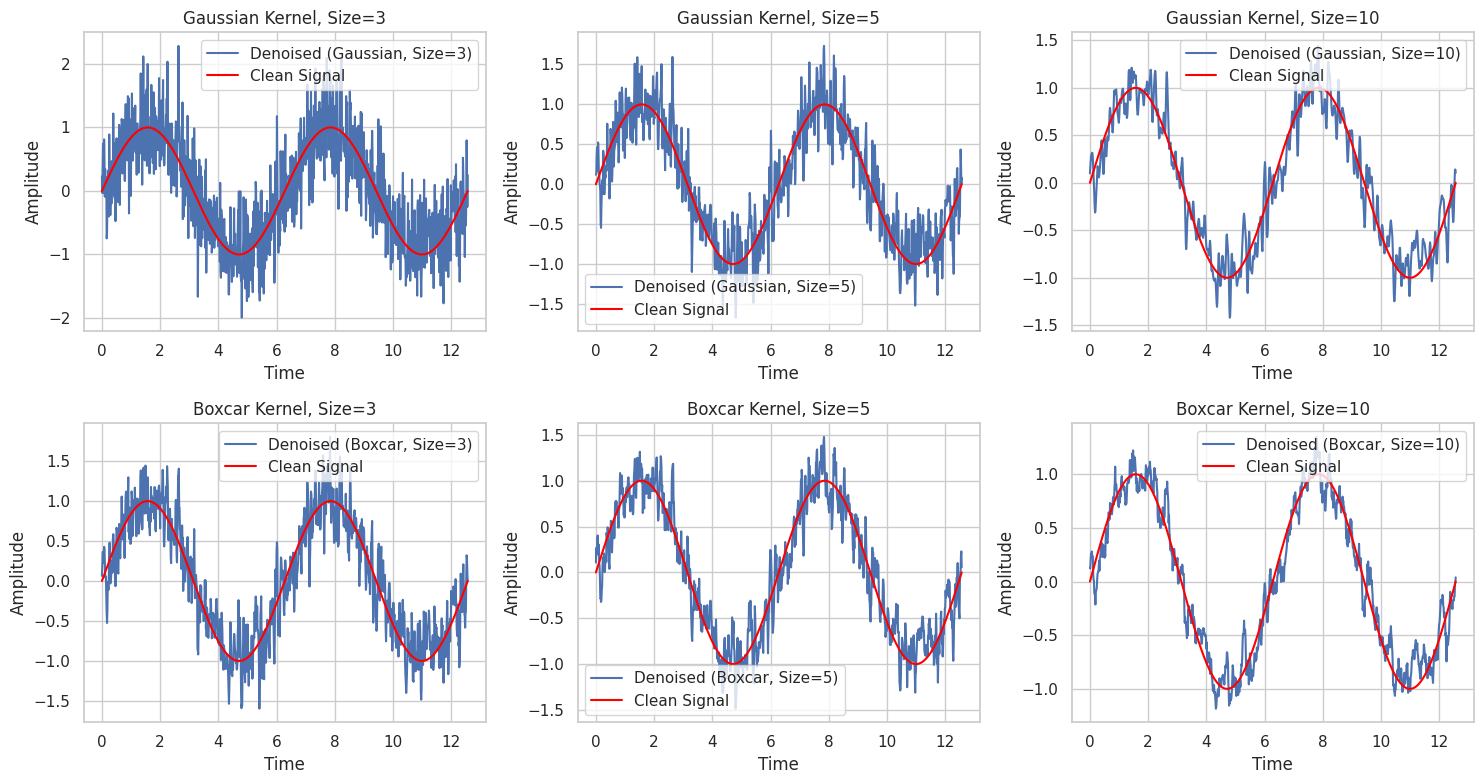

In [ ]:
# Define different convolution kernel sizes
gaussian_kernel_sizes = [3, 5, 10]
boxcar_kernel_sizes = [3, 5, 10]

# Plot denoised signals for different Gaussian kernel sizes
plt.figure(figsize=(15, 8))

for i, size in enumerate(gaussian_kernel_sizes):
    gaussian_kernel = np.exp(-np.linspace(-5, 5, size)**2 / (2 * 2**2)) / np.sum(np.exp(-np.linspace(-5, 5, size)**2 / (2 * 2**2)))
    denoised_gaussian = denoise_signal(noisy_signal, gaussian_kernel, size)
    mse_gaussian = mean_squared_error(clean_signal, denoised_gaussian)
    mae_gaussian = mean_absolute_error(clean_signal, denoised_gaussian)

    print(f"Gaussian Kernel, Size={size}: MSE = {mse_gaussian:.4f}, MAE = {mae_gaussian:.4f}")

    plt.subplot(2, 3, i + 1)
    plt.plot(t, denoised_gaussian, label=f'Denoised (Gaussian, Size={size})')
    plt.plot(t, clean_signal, label='Clean Signal', color='red')
    plt.title(f'Gaussian Kernel, Size={size}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

# Plot denoised signals for different Boxcar kernel sizes
for i, size in enumerate(boxcar_kernel_sizes):
    boxcar_kernel = np.ones(size) / size
    denoised_boxcar = denoise_signal(noisy_signal, boxcar_kernel, size)
    mse_boxcar = mean_squared_error(clean_signal, denoised_boxcar)
    mae_boxcar = mean_absolute_error(clean_signal, denoised_boxcar)

    print(f"Boxcar Kernel, Size={size}: MSE = {mse_boxcar:.4f}, MAE = {mae_boxcar:.4f}")

    plt.subplot(2, 3, i + 4)
    plt.plot(t, denoised_boxcar, label=f'Denoised (Boxcar, Size={size})')
    plt.plot(t, clean_signal, label='Clean Signal', color='red')
    plt.title(f'Boxcar Kernel, Size={size}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

As the size of the Gaussian kernel increases, both MSE and MAE decrease.
Smaller kernel (Size=3) results in higher errors, indicating less effective denoising.
Larger kernels (Size=10) lead to lower errors, suggesting improved denoising performance.

Similar to the Gaussian kernel, increasing the size of the Boxcar kernel reduces both MSE and MAE.
Smaller kernel (Size=3) results in higher errors, indicating less effective denoising.
Larger kernels (Size=10) lead to lower errors, indicating better denoising performance.

Smaller kernel sizes might not effectively capture complex patterns, leading to higher errors.
Larger kernel sizes are more effective at noise reduction but may lead to loss of finer details in the signal.

The results suggest that a kernel size of 10 performs better in terms of denoising for both Gaussian and Boxcar kernels.

From the results presented, it can be seen from the results and graphs that the best kernel size is 5. At it the signal is not strongly smoothed, as at 10, but also does not have strong noise, as at 3

# Task 3

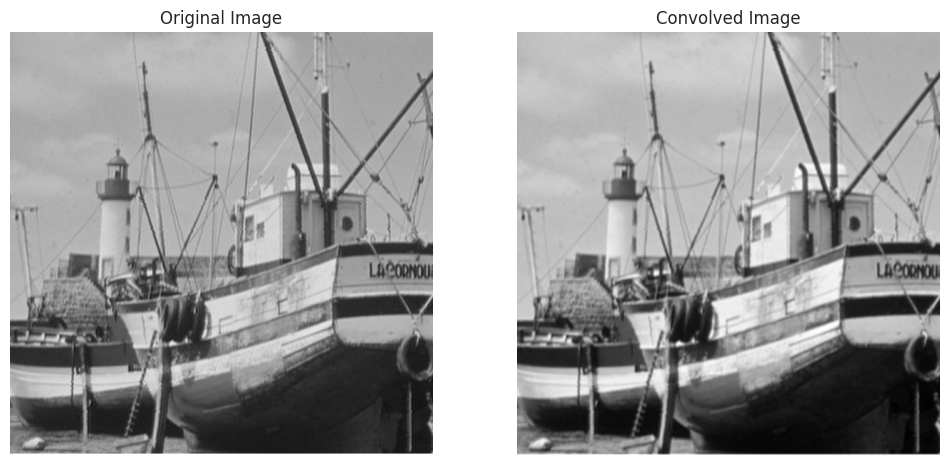

In [ ]:
from PIL import Image

def convolution(image, kernel):
    """
    Perform convolution operation on the input image with the given kernel.

    Parameters:
    - image: Input image of shape (C, H, W)
    - kernel: Convolution kernel of shape (kH, kW)

    Returns:
    - Output image after convolution
    """
    C, H, W = image.shape
    kH, kW = kernel.shape

    if kH > H or kW > W:
        raise ValueError("Kernel size should be smaller than the image size.")

    output_image = np.zeros((C, H - kH + 1, W - kW + 1))

    for i in range(H - kH + 1):
        for j in range(W - kW + 1):
            output_image[:, i, j] = np.sum(image[:, i:i+kH, j:j+kW] * kernel)

    return output_image

# Load a real image using PIL
image_path = "/content/drive/MyDrive/Colab Notebooks/example.jpg"
real_image = np.array(Image.open(image_path).convert("RGB")).transpose(2, 0, 1)

# Define a simple kernel (3x3) for illustration
simple_kernel =1/9* np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])

# Apply convolution to the real image with the simple kernel
output_convolution = convolution(real_image, simple_kernel)

# Display the original and convolved images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(real_image.transpose(1, 2, 0))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_convolution[0], cmap='gray')  # Display only one channel for simplicity
plt.title("Convolved Image")
plt.axis("off")

plt.show()


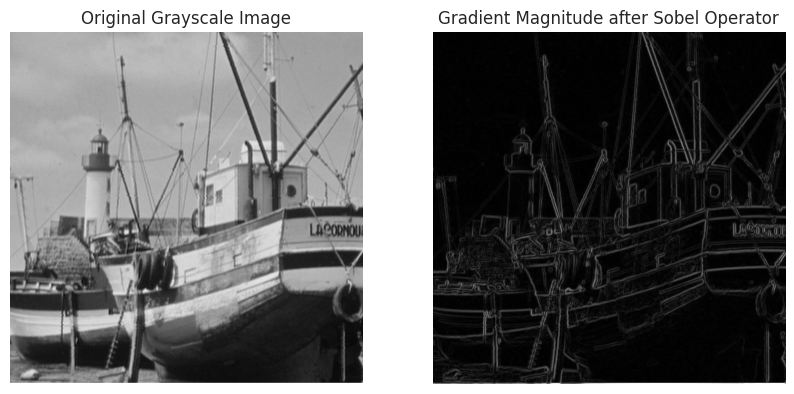

In [ ]:

def sobel_operator(image):
    """
    Apply Sobel operator to the input grayscale image.

    Parameters:
    - image: Input grayscale image of shape (1, H, W)

    Returns:
    - Gradient magnitude image after Sobel operator
    """
    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    # Apply convolution for horizontal and vertical gradients
    gradient_x = convolution(image, sobel_x)
    gradient_y = convolution(image, sobel_y)

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude

# Load a grayscale image for testing
image_path = "/content/drive/MyDrive/Colab Notebooks/example.jpg"
grayscale_image = np.array(Image.open(image_path).convert("L"))[None, :, :]

# Apply Sobel operator to the grayscale image
gradient_magnitude = sobel_operator(grayscale_image)

# Display the original grayscale image and the gradient magnitude
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image[0], cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude[0], cmap='gray')
plt.title("Gradient Magnitude after Sobel Operator")
plt.axis("off")

plt.show()
